In [1]:
import logging

выполнить
pip install -U gensim

In [2]:
import gensim

Библиотека на языке Python, которая специализируется на алгоритмах анализа текстов и тематическом моделировании. Она предоставляет простой интерфейс для работы с текстовыми данными, включая функционал для векторизации текста, создания моделей тематического моделирования, сравнения текстов и других задач.
Одним из ключевых компонентов Gensim является Word2Vec, модель, предназначенная для создания векторных представлений слов на основе контекста, в котором они встречаются.

выполнить 
pip install nltk

In [3]:
import nltk

NLTK (Natural Language Toolkit) — одна из самых известных библиотек для обработки текстовых данных на Python. Предлагает удобные инструменты для множества задач NLP: токенизация, стемминг, лемматизация, морфологический и синтаксический анализ, а также анализ настроений. 

В NLTK включены корпуса текстов и словарные ресурсы, такие как WordNet, позволяющие работать с огромным объемом текстовых данных. Это делает NLTK мощным инструментом для анализа и обработки текста на разных языках.

In [4]:
nltk.download('stopwords') #на русском
nltk.download('omw-1.4') # на английском
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Виктория\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Виктория\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Стоп-слова — это общеупотребительные слова в языке, которые обычно несут мало смысловой нагрузки (например, "и", "в", "на"). Их удаление позволяет сократить объем данных для анализа и сосредоточиться на более значимых словах, что повышает точность и эффективность обработки текста.

In [5]:
import re

Работа с регулярными выражениями. 

Наиболее популярные методы, которые предоставляет модуль:
- re.match() - метод ищет по заданному шаблону в начале строки
- re.search() - ищет по всей строке, но возвращает только первое найденное совпадение
- re.findall() - возвращает список всех найденных совпадений
- re.split() - разделит строку столько раз, сколько возможно
- re.sub() - ищет шаблон в строке и заменяет его на указанную подстроку. Если шаблон не найден, строка остается неизменной.
- re.compile() - собирает регулярное выражение в отдельный объект, который может быть использован для поиска

In [6]:
from bs4 import BeautifulSoup

Библиотека Python для извлечения данных из файлов HTML и XML. Для естественной навигации, поиска и изменения дерева HTML, модуль BeautifulSoup4, по умолчанию использует встроенный в Python парсер html.parser. BS4 так же поддерживает ряд сторонних парсеров Python, таких как lxml, html5lib и xml (для разбора XML-документов).

In [7]:
import pandas as pd
import numpy as np
from numpy import random
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt

In [8]:
%matplotlib inline

Команда, специфичная для IPython (или Jupyter notebook), которая позволяет встроить графики прямо внутрь ноутбука, а не в новом окне.

In [8]:
df = pd.read_csv('spam_Emails_data.csv', encoding ='latin-1')
df = df[pd.notnull(df['text'])]
df.head(10)

,label,text
0,Spam,viiiiiiagraaaa\nonly for the ones that want to...
1,Ham,got ice thought look az original message ice o...
2,Spam,yo ur wom an ne eds an escapenumber in ch ma n...
3,Spam,start increasing your odds of success & live s...
4,Ham,author jra date escapenumber escapenumber esca...
5,Spam,img src escapenumberd http loan co kr img emai...
6,Ham,attached is the weekly deal report from 10 / 1...
7,Ham,this is the version that we created earlier th...
8,Ham,pulp writing printing paper escapenumber escap...
9,Ham,stefan metze metzmacher writes stefan metze m...


In [10]:
df.isna().sum()

label    0
text     0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193850 entries, 0 to 193851
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   label   193850 non-null  object
 1   text    193850 non-null  object
dtypes: object(2)
memory usage: 4.4+ MB


In [11]:
df['label'].apply(lambda x: len(x.split(' '))).sum()

193850

In [12]:
df['text'].unique()

array(["viiiiiiagraaaa\nonly for the ones that want to make her scream .\nprodigy scrawny crow define upgrade spongy balboa dither moiseyev schumann variegate ponce bernie cox angeles impassive circulate impend miscellany chalkboard whizzing pend armenian cutlet waring makeshift fletch dispel crest cadet dovetail rapprochement gerry bayreuth selectman wilmington tuttle alchemy itt bullyboy .\ncaan ' t do . . .\n",
       'got ice thought look az original message ice operations mailto iceoperations intcx com sent friday october escapenumber escapenumber escapenumber escapenumber pm subject escapelong amended participant agreement dear participant receiving email identified company user administrator legal counsel signatory escapelong participant agreement serves notice intercontinentals intent amend agreement effective december escapenumber escapenumber relevant documentation attached includes contact information questions thank escapelong inc',
       'yo ur wom an ne eds an escapenumb

у нас более 193 тысяч данных

In [14]:
print(df.columns)

Index(['label', 'text'], dtype='object')


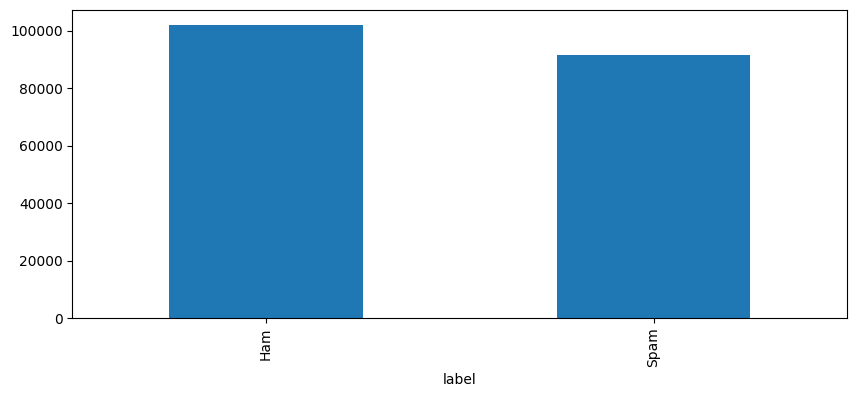

In [11]:
my_tags = ['Ham','Spam']
plt.figure(figsize=(10,4))
df.label.value_counts().plot(kind='bar')
plt.show();

In [16]:
# функция для просмотра инфы в тэге

def print_plot(index):
    example = df[df.index == index][['text', 'label']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Tag:', example[1])
    return example[0]

In [17]:
print_plot(10)

hey life sounds horribly busy figured worry thought get things moving sincenow officially replaced announced directreports london fernley sure spoken isanxious put announcement enron europe phillip lord iare leaving melissa stepping replace us since phillip already place go would nice could atleast say going north america energy ops something evenif details worked sure want come meet commercial customers also never met delainey think butmaybe knowing frevert well enough planning come november first half work europe plan coordinate brent wes theother groups frevert maybe meet people would loveto discussmonday fine sure today another crazy day know reviews john sherriff put 5 per review perday penalty dept head reviews done august15 th course holiday week 2 days todo 10 reviews hopefully help direct report problem talk today good weekend bethenron capital trade resources corp sally beck 13 10 2000 01 19to beth apollo lon ect ectcc subject stuffcrazy week 7 00 pm finished project delainey

'hey life sounds horribly busy figured worry thought get things moving sincenow officially replaced announced directreports london fernley sure spoken isanxious put announcement enron europe phillip lord iare leaving melissa stepping replace us since phillip already place go would nice could atleast say going north america energy ops something evenif details worked sure want come meet commercial customers also never met delainey think butmaybe knowing frevert well enough planning come november first half work europe plan coordinate brent wes theother groups frevert maybe meet people would loveto discussmonday fine sure today another crazy day know reviews john sherriff put 5 per review perday penalty dept head reviews done august15 th course holiday week 2 days todo 10 reviews hopefully help direct report problem talk today good weekend bethenron capital trade resources corp sally beck 13 10 2000 01 19to beth apollo lon ect ectcc subject stuffcrazy week 7 00 pm finished project delaine

 Видим, что текст нужно почистить

In [18]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}[]\\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text

выполнить pip install lxml

In [19]:
df['text'] = df['text'].apply(clean_text)

In [20]:
type(print_plot(10))

hey life sounds horribly busy figured worry thought get things moving sincenow officially replaced announced directreports london fernley sure spoken isanxious put announcement enron europe phillip lord iare leaving melissa stepping replace us since phillip already place go would nice could atleast say going north america energy ops something evenif details worked sure want come meet commercial customers also never met delainey think butmaybe knowing frevert well enough planning come november first half work europe plan coordinate brent wes theother groups frevert maybe meet people would loveto discussmonday fine sure today another crazy day know reviews john sherriff put 5 per review perday penalty dept head reviews done august15 th course holiday week 2 days todo 10 reviews hopefully help direct report problem talk today good weekend bethenron capital trade resources corp sally beck 13 10 2000 01 19to beth apollo lon ect ectcc subject stuffcrazy week 7 00 pm finished project delainey

str

In [21]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

def bag_of_words_simple(docs):
    """
    Простая реализация мешка слов для списка документов (предложений).
    """
    # Токенизация документов
    tokenized_docs = [doc.split() for doc in docs]
    
    # Создание множества всех уникальных слов
    dictionary = set(word for doc in tokenized_docs for word in doc)
    
    # Создание BoW для каждого документа
    bow = [Counter(doc) for doc in tokenized_docs]
    
    for i, doc in enumerate(bow):
        print(f"Документ {i}: {doc}.")

bag_of_words_simple([print_plot(10), print_plot(11)])

hey life sounds horribly busy figured worry thought get things moving sincenow officially replaced announced directreports london fernley sure spoken isanxious put announcement enron europe phillip lord iare leaving melissa stepping replace us since phillip already place go would nice could atleast say going north america energy ops something evenif details worked sure want come meet commercial customers also never met delainey think butmaybe knowing frevert well enough planning come november first half work europe plan coordinate brent wes theother groups frevert maybe meet people would loveto discussmonday fine sure today another crazy day know reviews john sherriff put 5 per review perday penalty dept head reviews done august15 th course holiday week 2 days todo 10 reviews hopefully help direct report problem talk today good weekend bethenron capital trade resources corp sally beck 13 10 2000 01 19to beth apollo lon ect ectcc subject stuffcrazy week 7 00 pm finished project delainey

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

def tf_idf(docs):
    """
    Реализация TF-IDF с использованием scikit-learn.
    """
    # Инициализация vectorizer
    vectorizer = TfidfVectorizer()
    
    # Вычисление TF-IDF
    tfidf_matrix = vectorizer.fit_transform(docs)
    
    # Вывод результатов
    print("Фичи (слова/термины):")
    print(vectorizer.get_feature_names_out())
    
    print("\nTF-IDF матрица (первые два документа):")
    print(tfidf_matrix.toarray()[:2, :])  # Печатаем данные для первых двух документов

tf_idf([print_plot(10), print_plot(11)])


hey life sounds horribly busy figured worry thought get things moving sincenow officially replaced announced directreports london fernley sure spoken isanxious put announcement enron europe phillip lord iare leaving melissa stepping replace us since phillip already place go would nice could atleast say going north america energy ops something evenif details worked sure want come meet commercial customers also never met delainey think butmaybe knowing frevert well enough planning come november first half work europe plan coordinate brent wes theother groups frevert maybe meet people would loveto discussmonday fine sure today another crazy day know reviews john sherriff put 5 per review perday penalty dept head reviews done august15 th course holiday week 2 days todo 10 reviews hopefully help direct report problem talk today good weekend bethenron capital trade resources corp sally beck 13 10 2000 01 19to beth apollo lon ect ectcc subject stuffcrazy week 7 00 pm finished project delainey

Уже лучше. Можем обучаться)

In [24]:
X = df.text
y = df.label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [20]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

AttributeError: 'TaggedDocument' object has no attribute 'lower'

In [27]:
my_tags = ['Ham','Spam']

In [28]:
%%time
from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print(classification_report(y_test, y_pred,target_names=my_tags))

              precision    recall  f1-score   support

         Ham       0.94      0.99      0.96     30566
        Spam       0.99      0.93      0.96     27589

    accuracy                           0.96     58155
   macro avg       0.96      0.96      0.96     58155
weighted avg       0.96      0.96      0.96     58155

CPU times: total: 4.92 s
Wall time: 14.4 s


 # Линейный градиентный спуск

In [29]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf',
                 SGDClassifier(alpha=0.001, max_iter=5, random_state=42,
                               tol=None))])

In [30]:
%%time

y_pred = sgd.predict(X_test)

print(classification_report(y_test, y_pred,target_names=my_tags))

              precision    recall  f1-score   support

         Ham       0.96      0.92      0.94     30566
        Spam       0.91      0.96      0.94     27589

    accuracy                           0.94     58155
   macro avg       0.94      0.94      0.94     58155
weighted avg       0.94      0.94      0.94     58155

CPU times: total: 5.28 s
Wall time: 13 s


In [19]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)

NameError: name 'Pipeline' is not defined

In [32]:
%%time

y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.987172212191557
              precision    recall  f1-score   support

         Ham       0.98      0.99      0.99     30566
        Spam       0.99      0.98      0.99     27589

    accuracy                           0.99     58155
   macro avg       0.99      0.99      0.99     58155
weighted avg       0.99      0.99      0.99     58155

CPU times: total: 7.98 s
Wall time: 11.6 s


In [37]:
%%time
from gensim.models import Word2Vec

#Готовый набор векторов слов на базе Гугл новостей. Упрощенно - большой словарь синонимов
wv = gensim.models.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin.gz", binary=True)
wv.fill_norms()

CPU times: total: 26.8 s
Wall time: 5min 23s


In [38]:
#Функция, превращающая текст в вектор
def word_averaging(wv, words): 
    all_words, mean = set(), []
    
    for word in words:
        if isinstance(word, np.ndarray):
            mean.append(word)
        elif word in wv:
            mean.append(wv.get_vector(word, norm=True))
            all_words.add(wv.key_to_index[word])

    if not mean:
        logging.warning("cannot compute similarity with no input %s", words)
        return np.zeros(wv.vector_size,)

    mean = gensim.matutils.unitvec(np.array(mean).mean(axis=0)).astype(np.float32)
    return mean

def  word_averaging_list(wv, text_list):
    return np.vstack([word_averaging(wv, post) for post in text_list ])

In [39]:
#Разобьем полученные данные на массив (ndarray), строками в котором будут списки (list), где каждый элемент списка – отдельное слово.
def w2v_tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(sent, language='english'):
            if len(word) < 2:
                continue
            tokens.append(word)
    return tokens

Приступаем непосредственно к тренировке.

Используя вышеобъявленную функцию превратим наш Датафрейм в массив с инцидентами (каждый инцидент это список, в котором отдельный элемент списка – слово)

In [41]:
%%time
nltk.download('punkt')
nltk.download('punkt_tab')

train, test = train_test_split(df, test_size=0.3, random_state = 42)

test_tokenized = test.apply(lambda r: w2v_tokenize_text(r['text']), axis=1).values
train_tokenized = train.apply(lambda r: w2v_tokenize_text(r['text']), axis=1).values

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Виктория\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Виктория\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


CPU times: total: 1min 8s
Wall time: 3min 13s


In [42]:
%%time
X_train_word_average = word_averaging_list(wv,train_tokenized)
X_test_word_average = word_averaging_list(wv,test_tokenized)

CPU times: total: 1min 43s
Wall time: 4min 32s


In [45]:
pip install catboost

   ---------------------------------------- 0.0/101.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/101.8 MB ? eta -:--:--
   ---------------------------------------- 0.5/101.8 MB 730.2 kB/s eta 0:02:19
   ---------------------------------------- 0.5/101.8 MB 730.2 kB/s eta 0:02:19
   ---------------------------------------- 0.5/101.8 MB 730.2 kB/s eta 0:02:19
   ---------------------------------------- 0.8/101.8 MB 621.9 kB/s eta 0:02:43
   ---------------------------------------- 0.8/101.8 MB 621.9 kB/s eta 0:02:43
   ---------------------------------------- 1.0/101.8 MB 637.3 kB/s eta 0:02:39
    --------------------------------------- 1.3/101.8 MB 664.5 kB/s eta 0:02:32
    --------------------------------------- 1.3/101.8 MB 664.5 kB/s eta 0:02:32
    --------------------------------------- 1.6/101.8 MB 693.5 kB/s eta 0:02:25
    --------------------------------------- 1.6/101.8 MB 693.5 kB/s

ERROR: Could not install packages due to an OSError: [Errno 28] No space left on device



In [50]:
import xgboost as xgb
import catboost as cbm
import lightgbm as lgb

In [54]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(n_jobs=3, C=1e5)
logreg = logreg.fit(X_train_word_average, train['label'])
y_pred = logreg.predict(X_test_word_average)

In [55]:
print('accuracy %s' % accuracy_score(y_pred, test.label))
print(classification_report(test.label, y_pred,target_names=my_tags))

accuracy 0.9290516722551801
              precision    recall  f1-score   support

         Ham       0.93      0.93      0.93     30566
        Spam       0.92      0.93      0.93     27589

    accuracy                           0.93     58155
   macro avg       0.93      0.93      0.93     58155
weighted avg       0.93      0.93      0.93     58155



In [57]:
cbmC = cbm.CatBoostClassifier(learning_rate=0.1, early_stopping_rounds=15, eval_metric='AUC', task_type="CPU")
cbmC.fit(X_train_word_average, train.label, eval_set=(X_test_word_average, test.label), plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.8752226	best: 0.8752226 (0)	total: 708ms	remaining: 11m 47s
1:	test: 0.9020517	best: 0.9020517 (1)	total: 1.65s	remaining: 13m 42s
2:	test: 0.9149905	best: 0.9149905 (2)	total: 2.02s	remaining: 11m 11s
3:	test: 0.9206348	best: 0.9206348 (3)	total: 2.42s	remaining: 10m 1s
4:	test: 0.9266642	best: 0.9266642 (4)	total: 2.81s	remaining: 9m 18s
5:	test: 0.9304369	best: 0.9304369 (5)	total: 3.14s	remaining: 8m 39s
6:	test: 0.9321029	best: 0.9321029 (6)	total: 3.43s	remaining: 8m 6s
7:	test: 0.9365295	best: 0.9365295 (7)	total: 3.9s	remaining: 8m 3s
8:	test: 0.9396795	best: 0.9396795 (8)	total: 4.15s	remaining: 7m 37s
9:	test: 0.9425924	best: 0.9425924 (9)	total: 4.44s	remaining: 7m 19s
10:	test: 0.9451867	best: 0.9451867 (10)	total: 4.74s	remaining: 7m 5s
11:	test: 0.9473065	best: 0.9473065 (11)	total: 5.04s	remaining: 6m 54s
12:	test: 0.9484302	best: 0.9484302 (12)	total: 5.3s	remaining: 6m 42s
13:	test: 0.9509301	best: 0.9509301 (13)	total: 5.57s	remaining: 6m 32s
14:	test: 0.95

In [59]:
%%time
y_pred = cbmC.predict(X_test_word_average)

print('accuracy %s' % accuracy_score(y_pred, test.label))
print(classification_report(test.label, y_pred,target_names=my_tags))

accuracy 0.9768205657295159
              precision    recall  f1-score   support

         Ham       0.98      0.98      0.98     30566
        Spam       0.98      0.98      0.98     27589

    accuracy                           0.98     58155
   macro avg       0.98      0.98      0.98     58155
weighted avg       0.98      0.98      0.98     58155

CPU times: total: 2.91 s
Wall time: 7.08 s


# Doc2vec and Logistic Regression

In [9]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
import gensim
from gensim.models.doc2vec import TaggedDocument
import re

In [10]:
doc2vec = Doc2Vec()

In [11]:
def label_sentences(corpus, label_type):
    """
    Gensim's Doc2Vec implementation requires each document/paragraph to have a label associated with it.
    We do this by using the TaggedDocument method. The format will be "TRAIN_i" or "TEST_i" where "i" is
    a dummy index of the post.
    """
    labeled = []
    for i, v in enumerate(corpus):
        label = label_type + '_' + str(i)
        labeled.append(TaggedDocument(v.split(), [label]))
    return labeled

In [ ]:
%%time
X_train, X_test, y_train, y_test = train_test_split(df.text, df.label, random_state=0, test_size=0.3)
X_train = label_sentences(X_train, 'Train')
X_test = label_sentences(X_test, 'Test')
all_data = X_train + X_test

In [14]:
%%time
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, min_count=1, alpha=0.065, min_alpha=0.065)
model_dbow.build_vocab([x for x in tqdm(all_data)])

100%|██████████| 193850/193850 [00:00<00:00, 2826039.97it/s]


CPU times: total: 13.8 s
Wall time: 1min 6s


In [15]:
%%time
for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(all_data)]), total_examples=len(all_data), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|██████████| 193850/193850 [00:00<00:00, 1175399.04it/s]


CPU times: total: 48min 57s
Wall time: 7h 19min 49s


In [16]:
def get_vectors(model, corpus_size, vectors_size, vectors_type):
    """
    Get vectors from trained doc2vec model
    :param doc2vec_model: Trained Doc2Vec model
    :param corpus_size: Size of the data
    :param vectors_size: Size of the embedding vectors
    :param vectors_type: Training or Testing vectors
    :return: list of vectors
    """
    vectors = np.zeros((corpus_size, vectors_size))
    for i in range(0, corpus_size):
        prefix = vectors_type + '_' + str(i)
        vectors[i] = model.dv[prefix]
    return vectors

In [17]:
%%time
train_vectors_dbow = get_vectors(model_dbow, len(X_train), 300, 'Train')
test_vectors_dbow = get_vectors(model_dbow, len(X_test), 300, 'Test')

CPU times: total: 1.81 s
Wall time: 21.5 s


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

In [22]:
%%time
logreg = LogisticRegression(n_jobs=3, C=1e5)
logreg.fit(train_vectors_dbow, y_train)

CPU times: total: 469 ms
Wall time: 31.8 s


LogisticRegression(C=100000.0, n_jobs=3)

In [23]:
%%time
logreg = logreg.fit(train_vectors_dbow, y_train)
y_pred = logreg.predict(test_vectors_dbow)

CPU times: total: 422 ms
Wall time: 14.1 s


In [25]:
my_tags = ['Ham','Spam']

In [26]:
print(classification_report(y_test, y_pred,target_names=my_tags))

              precision    recall  f1-score   support

         Ham       0.95      0.95      0.95     30652
        Spam       0.94      0.95      0.94     27503

    accuracy                           0.95     58155
   macro avg       0.95      0.95      0.95     58155
weighted avg       0.95      0.95      0.95     58155



# BoW With Keras

In [30]:
import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from tensorflow.keras.preprocessing import text, sequence
from keras import utils

In [31]:
%%time
train_size = int(len(df) * .7)
print ("Train size: %d" % train_size)
print ("Test size: %d" % (len(df) - train_size))

Train size: 135695
Test size: 58155
CPU times: total: 0 ns
Wall time: 5.44 ms


In [32]:
%%time
train_text = df['text'][:train_size]
train_label = df['label'][:train_size]

test_text = df['text'][train_size:]
test_label = df['label'][train_size:]

CPU times: total: 0 ns
Wall time: 37.7 ms


In [33]:
%%time
max_words = 1000
tokenize = text.Tokenizer(num_words=max_words, char_level=False)

CPU times: total: 0 ns
Wall time: 0 ns


In [48]:
%%time
tokenize.fit_on_texts(train_text) # only fit on train
x_train = tokenize.texts_to_matrix(train_text)
x_test = tokenize.texts_to_matrix(test_text)

CPU times: total: 26.6 s
Wall time: 1min 17s


In [49]:
print(x_train.shape)
print(x_test.shape)

(135695, 1000)
(58155, 1000)


In [50]:
%%time
encoder = LabelEncoder()
encoder.fit(train_label)
y_train = encoder.transform(train_label)
y_test = encoder.transform(test_label)

CPU times: total: 62.5 ms
Wall time: 86.1 ms


In [51]:
print(y_train.shape)
print(y_test.shape)

(135695,)
(58155,)


In [52]:
%%time
num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

CPU times: total: 0 ns
Wall time: 8.58 ms


In [53]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (135695, 1000)
x_test shape: (58155, 1000)
y_train shape: (135695, 2)
y_test shape: (58155, 2)


In [54]:
batch_size = 32
epochs = 5

In [55]:
%%time
# Build the model
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

CPU times: total: 46.9 ms
Wall time: 463 ms


In [56]:
%%time
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Epoch 1/5
3817/3817 [==============================] - 34s 9ms/step - loss: 0.1149 - accuracy: 0.9576 - val_loss: 0.0790 - val_accuracy: 0.9713
Epoch 2/5
3817/3817 [==============================] - 34s 9ms/step - loss: 0.0630 - accuracy: 0.9772 - val_loss: 0.0623 - val_accuracy: 0.9789
Epoch 3/5
3817/3817 [==============================] - 33s 9ms/step - loss: 0.0451 - accuracy: 0.9841 - val_loss: 0.0613 - val_accuracy: 0.9797
Epoch 4/5
3817/3817 [==============================] - 34s 9ms/step - loss: 0.0347 - accuracy: 0.9882 - val_loss: 0.0594 - val_accuracy: 0.9821
Epoch 5/5
3817/3817 [==============================] - 33s 9ms/step - loss: 0.0288 - accuracy: 0.9902 - val_loss: 0.0641 - val_accuracy: 0.9825
CPU times: total: 1min 53s
Wall time: 3min 4s


In [57]:
print(x_test.shape)
print(y_test.shape)

(58155, 1000)
(58155, 2)


In [58]:
%%time
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test accuracy:', score[1])

1818/1818 [==============================] - 6s 3ms/step - loss: 0.0636 - accuracy: 0.9816
Test accuracy: 0.9815664887428284
CPU times: total: 3.69 s
Wall time: 6.46 s
